## EE 461P: Data Science Principles  
### Assignment 4 
### Total points: 80
### Due: April 6, 2021 submitted via Canvas by 11:59 pm  

Your homework should be written in a **Jupyter notebook**. You may work in groups of two if you wish. Only one student per team needs to submit the assignment on Canvas.  But be sure to include name and UT eID for both students.  Homework groups will be created and managed through Canvas, so please do not arbitrarily change your homework group. If you do change, let the TAs know.

Also, please make sure your code runs and the graphics (and anything else) are displayed in your notebook before submitting. (%matplotlib inline). You can also follow the below steps to embed an image,
* Set cell mode to Markdown
* Drag and drop your image into the cell. The following command will be created:
`![image.png](attachment:image.png)` 
* Execute/Run the cell and the image will be displayed. Once you submit make sure to download the notebook and verify if the image exists.

### Name(s) and EID(s):
1. Simoni Maniar (ssm3256)
2. 

### Homework group No.:  2

`NOTE : Fill the Name and EID section along with group number without fail.`

In [1]:
# Upgrade scikit learn to the latest version
!pip install --upgrade scikit-learn

Requirement already up-to-date: scikit-learn in c:\users\simoni\anaconda3\lib\site-packages (0.24.1)


# Question 1 (Data Imputation and Feature Selection) (15 pts)

In this question, we will explore how to impute missing values in a given dataset and perform feature engineering. 

We will be using the WHO Life Expectancy Data, which measures the life expectancy from health factors for 193 countries collected from the WHO data repository website and its corresponding economic data collected from United Nation website. More information on the dataset can be found [here](https://www.kaggle.com/kumarajarshi/life-expectancy-who).Use the below code to load the dataset, the predictor variable is "Life Expectancy" and the rest are the feature variables. 

`orig_df` contains data from all years except 2014 and `orig_df_2014` contains data from only 2014. 

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SequentialFeatureSelector
import os, sys, re
import time
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.metrics import plot_roc_curve 
import matplotlib.pyplot as plt

# Load the dataset from csv files
orig_df = pd.read_csv("Life Expectancy Data.csv")
orig_df = orig_df[(orig_df['Life_expectancy'].notna()) & (orig_df['Year'] != 2015)]

# Select only 2014 data
orig_df_2014 = orig_df[orig_df['Year']== 2014]

# Drop the year column
orig_df_2014 = orig_df_2014.drop(columns=["Year"])




* **Part 1** : Report the datatype of the column values in the `orig_df_2014` dataframe, this helps to identify the categorical, numerical feature variables present in the dataset. Drop the categorical columns in the `orig_df_2014` dataset and create a new dataframe with only numerical valued columns and name it `numerical_df_2014`. Print the number of missing values(NaN) for each column in this `numerical_df_2014` dataframe.  **(1 pts)**

* **Part 2** : In this part we will explore different ways to handle missing data, you can make use of the pandas dataframe's function available, refer [here](https://pandas.pydata.org/docs/reference/frame.html).
  
  * a) Create a copy of the numerical_df_2014 dataframe and name it `numerical_df_na_drop_row`. Drop all the NaN rows in `numerical_df_na_drop_row`, then split the dataframe into y(Life_expectancy) which is the predictor variable and the rest as X. Split the dataset using train_test_split with random_state = 42 and train:test split as 70:30. Fit a linear regression model on train data and evaluate the model on the test data by reporting the test ${R^2}$ score. **(2 pts)**

  * b) Next, Create another copy of the numerical_df_2014 dataframe and name it `numerical_df_na_fill_zero`. Now, fill the NaN values with zeros in `numerical_df_na_fill_zero`, then split the dataframe into y(Life_expectancy) which is the predictor variable and the rest as X. Split the dataset using train_test_split with random_state = 42 and train:test split as 70:30. Fit a linear regression model on train data and evaluate the model on the test data by reporting the test ${R^2}$ score.**(2 pts)**

  * c) Finally, Create a copy of the numerical_df_2014 dataframe and name it `numerical_df_na_drop_cols`. Drop all the features(columns) which contain NaN values in `numerical_df_na_drop_cols` then split the dataframe into y(Life_expectancy) which is the predictor variable and the rest as X. Split the dataset using train_test_split with random_state = 42 and train:test split as 70:30. Fit a linear regression model on train data and evaluate the model on the test data by reporting the test ${R^2}$ score.**(2 pts)**

  * d) Compare the test ${R^2}$ score value obtained in part a), b) and c) explain what you observe in the scores, provide reasoning on which is your preferred method to handle missing data and why? **(2 pts)**

* **Part 3** (Feature selection): In this part we will be using the  `numerical_df_na_drop_row` dataframe created by dropping all NaN samples in part 2a). Split this dataset into train:test split of 70:30 with random_state 42 and use the training data for the sub-parts below:

  * a) Compute the correlation of all the feature variables with the predictor variable(Life_expectancy). Report the five most correlated feature variable with the predictor using training data. (**1pts**)

  * b) Use Linear Regression as an estimator for Recursive Feature Selection. We will use Sequential Feature Selector to perform `forward` feature selection. Details on how to use Sequential Feature Selector is given [here](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SequentialFeatureSelector.html). Report the top five features selected after performing forward selection using training data.(**2pts**)

  * c) Use Decision Tree Regressor with random_state=20 from [sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html#sklearn.tree.DecisionTreeRegressor) with default parameters and fit the model on training data. Identify the feature importance from the fitted model and report the 5 most important features. (**1pts**)

  * d) Use the most common set of features obtained from the feature selection methods in part a) b) and c). Train a linear regression model on this subset of features by fitting it on train data and reporting the ${R^2}$ score on test data. Briefly eplain what you understand by feature selection and how it affects the model performance based on the results obtained.(**2pts**)



# Question 2 (15 pts) - Principal Component Analysis

In this problem we will be applying PCA on the Superconductivity Dataset. More details on the dataset is present [here](https://archive.ics.uci.edu/ml/datasets/Superconductivty+Data#). The goal here is to predict the critical temperature of a superconductor based on the features extracted.

Use Principal Component Analysis (PCA) to solve this problem.  

* **2.1 (1 pt)** Perform the following steps to prepare the dataset:
    * Load the dataset from the "Q2data.csv" file provided as a dataframe df. 

    * Select the **'critical_temp'** column as the target column and the rest of the columns from the dataframe df as X. 

    * Split the dataset into train and test set with 35% data in test set and random_state = 42

    * Perform [Standard Scaling](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler) on the dataset. Remember that when we have training and testing data, we fit preprocessing parameters on training data and apply them to all testing data. You should scale only the features (independent variables), not the target variable y.
    
    `Note: X should have 81 features.`
    
* **2.2 (3 pts)** Use [PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) and reduce the dimension of X_train to the following number of components: `[3,20,40,60,81]`. For each of the five datasets, print the cumulative variance explained by the principal components`N = [3,20,40,60,81]`.(i.e. what percentage of variance in the original dataset is explained if we transform the dataset to have 3,20,40,60 and 81 principal components respectively). 

  `Note : PCA should be fit on X_train and the components thus learnt should be later used to transform X_test`

* **2.3 (4 pts)** Plot the cumulative variance explained by the principal components using the training data. The plot should display the number of components on X-axis and the cumulative explained variance on the y-axis. What do you understand from the plot obtained?

* **2.4 (4 pts)** For each of the reduced dataset, obtained in part 2.2, fit a linear regression model on the train data and report the ${R^2}$ score on the test dataset. Comment on how the score varies as the number of components increase.(There will be a total of 5 ${R^2}$ score).

* **2.4 (3 pts)** Visualizing principal components : For this part use a small subset of 50 samples of the training dataset and plot the first three principal components, i.e first plot PC1 vs. PC2 (i.e. the projection of the data onto the 2-D space defined by the first two Principal Components) and also PC2 vs PC3 in both these plot color the projected points according to the corresponding ground truth labels. Do you observe any pattern in the plot?

  `Note : You will have two scatter plots for part 2.4`

# Solution 2

# Question 3 - Expected Loss Minimization (15 pts)
Consider a binary classification problem with the following loss matrix -
$$
   {\begin{array}{ccccc}
   & & \text{Predicted class} & \text{           } &\\
   & & C1 & C2 & Reject\\
   \text{True class} & C1 & 0 & 3 & c  \\
   & C2 & 2 & 0 & c \\
  \end{array} } 
$$
where the cost of rejection is a constant. Determine the prediction that minimizes the expected loss in different ranges of $P(C1|x)$ for the following three cases - 
1. c = 0
2. c = 2
3. c = 1

# Answer 3


1. Reject for all ranges of P(C1|X)
2. If P(C1|X) >= 0.6 choose C1. Otherwise, chose C2
3. If P(C1|X) >= 0.666 chose C1. Else, if P(C1|X) >= 0.5 and < 0.666, reject. Else, choose C2.  


With a rejection loss of 0, you want to reject for all ranges.
With a rejection loss of 2, you want to choose C2 from 0:0.6 and chose C1 from 0.6:1.
With a rejection loss of 1, you want to choose C2 from 0:0.5, reject from 0.5 to 0.666, and choose C1 from 0.666 to 1.


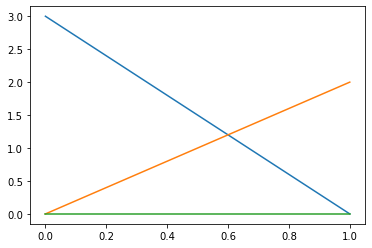

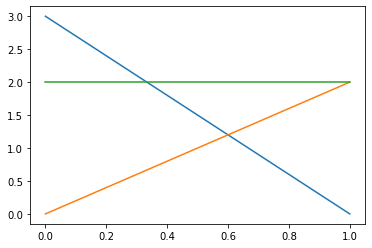

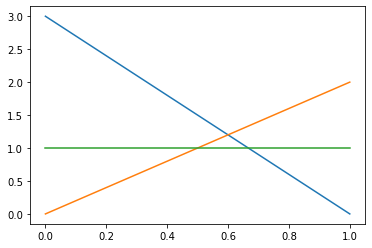

In [3]:
import matplotlib.pyplot as plt
c1 = [3,0]
c2 = [0,2]
r1 = [0,0]
r2 = [2,2]
r3 = [1,1]
plt.figure(1)
plt.plot(c1)
plt.plot(c2)
plt.plot(r1)
print("With a rejection loss of 0, you want to reject for all ranges.")
plt.figure(2)
plt.plot(c1)
plt.plot(c2)
plt.plot(r2)
print("With a rejection loss of 2, you want to choose C2 from 0:0.6 and chose C1 from 0.6:1.")
plt.figure(3)
plt.plot(c1)
plt.plot(c2)
plt.plot(r3)
print("With a rejection loss of 1, you want to choose C2 from 0:0.5, reject from 0.5 to 0.666, and choose C1 from 0.666 to 1.")

# Question 4 (20 pts) - Decision Tree Classifier using sklearn

**Customer Eligibility for Deposits**

We will build a Decision Tree classification model to predict if a customer will subscribe or no (yes/no).

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn import datasets
from io import StringIO
from sklearn.tree import export_graphviz
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn import metrics
%matplotlib inline

# Loading the data file
bank=pd.read_csv('bank.csv')
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


Input variables:
# bank client data:
1 - `age` (numeric)

2 - `job` : type of job (categorical: 'admin', 'blue-collar', 'entrepreneur', 'housemaid', 'management', 'retired', 'self-employed', 'services', 'student', 'technician', 'unemployed', 'unknown')

3 - `marital` : marital status (categorical: 'divorced','married','single'; note: 'divorced' means divorced or widowed)

4 - `education` (categorical: 'primary', 'secondary','tertiary')

5 - `default`: has credit in default? (categorical: 'no','yes','unknown')

6 - `balance`: account balance

7 - `housing`: has housing loan? (categorical: 'no','yes','unknown')

8 - `loan`: has personal loan? (categorical: 'no','yes','unknown')

# related with the last contact of the current campaign:
9 - `contact`: contact communication type (categorical: 'cellular','telephone')

10 - `day_of_month` : 1,2....31

11 - `month`: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')

12 - `duration`: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
13 - `campaign`: number of contacts performed during this campaign and for this client (numeric, includes last contact)

14 - `pdays`: number of days that passed by after the client was last contacted from a previous campaign (numeric; 10000 means client was not previously contacted)

15 - `previous`: number of contacts performed before this campaign and for this client (numeric)

16 - `poutcome`: outcome of the previous marketing campaign (categorical: 'failure','other','success','unknown')

# Output variable (desired target):
17 - `y` - has the client subscribed a term deposit? (binary: 'yes','no')

**All pre-processing is done where categorical variables are converted to numeric values and unnecessary columns are dropped.**

In [5]:
# Make a copy for parsing
bank_data = bank.copy()

# Drop 'contact', as every participant has been contacted. 
bank_data.drop('contact', axis=1, inplace=True)
# Drop 'month' and 'day' as they don't have any intrinsic meaning
bank_data.drop('month', axis=1, inplace=True)
bank_data.drop('day', axis=1, inplace=True)

#Convert categorical values to numeric values
# values for "default" : yes/no
bank_data["default"]
bank_data['default_cat'] = bank_data['default'].map( {'yes':1, 'no':0} )
bank_data.drop('default', axis=1,inplace = True)
# values for "housing" : yes/no
bank_data["housing_cat"]=bank_data['housing'].map({'yes':1, 'no':0})
bank_data.drop('housing', axis=1,inplace = True)
# values for "loan" : yes/no
bank_data["loan_cat"] = bank_data['loan'].map({'yes':1, 'no':0})
bank_data.drop('loan', axis=1, inplace=True)
# values for "deposit" : yes/no
bank_data["deposit_cat"] = bank_data['deposit'].map({'yes':1, 'no':0})
bank_data.drop('deposit', axis=1, inplace=True)

# Convert categorical variables to dummies
bank_data = pd.get_dummies(data=bank_data, columns = ['job', 'marital', 'education', 'poutcome'], \
                                   prefix = ['job', 'marital', 'education', 'poutcome'])

# Convert p_days to a probability value
bank_data['recent_pdays'] = np.where(bank_data['pdays'], 1/bank_data.pdays, 1/bank_data.pdays)
# Drop 'pdays'
bank_data.drop('pdays', axis=1, inplace = True)
bank_data.head()

,age,balance,duration,campaign,previous,default_cat,housing_cat,loan_cat,deposit_cat,job_admin.,...,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,recent_pdays
0,59,2343,1042,1,0,0,1,0,1,1,...,0,0,1,0,0,0,0,0,1,-1.0
1,56,45,1467,1,0,0,0,0,1,1,...,0,0,1,0,0,0,0,0,1,-1.0
2,41,1270,1389,1,0,0,1,0,1,0,...,0,0,1,0,0,0,0,0,1,-1.0
3,55,2476,579,1,0,0,1,0,1,0,...,0,0,1,0,0,0,0,0,1,-1.0
4,54,184,673,2,0,0,0,0,1,1,...,0,0,0,1,0,0,0,0,1,-1.0


In [6]:
# Splitting the data into training and test data with 80:20 ratio with random_state=50.
# Building the data model
# Train-Test split: 20% test data
X = bank_data.drop('deposit_cat', 1)
Y = bank_data.deposit_cat
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 50)

# Answer 4

a. **(8 pts)** Build decision trees with depths 2, 5, 10, 20 and max depth using gini and entropy criterion; report the train and test errors. Refer to [Decision Tree](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier) for more information on how to implement using sklearn.

b. **(2 pts)** Explain how the train and test accuracy varies as we increase the depth of the tree.

c. **(4 pts)** List the most [important feature](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier.feature_importances_) for the tree with depth=2 and criterion=gini and [plot the tree](https://scikit-learn.org/stable/auto_examples/tree/plot_unveil_tree_structure.html#sphx-glr-auto-examples-tree-plot-unveil-tree-structure-py). Name this tree model as `dt2`.


In [7]:
# a
from sklearn.metrics import mean_squared_error
arr = np.array([2, 5, 10, 20])
for i in arr:
    y = tree.DecisionTreeClassifier(criterion='entropy', max_depth=i).fit(X_train, Y_train).predict(X_train)
    print("MSE with training dataset, entropy criteria, max depth = {} : {}".format(i, mean_squared_error(Y_train, y)))
    y = tree.DecisionTreeClassifier(criterion='entropy', max_depth=i).fit(X_train, Y_train).predict(X_test)
    print("MSE with test dataset, entropy criteria, max depth = {} : {}".format(i, mean_squared_error(Y_test, y)))
    y = tree.DecisionTreeClassifier(criterion='gini', max_depth=i).fit(X_train, Y_train).predict(X_train)
    print("MSE with training dataset, gini criteria, max depth = {} : {}".format(i, mean_squared_error(Y_train, y)))
    y= tree.DecisionTreeClassifier(criterion='gini', max_depth=i).fit(X_train, Y_train).predict(X_test)
    print("MSE with test dataset, gini criteria, max depth = {} : {}".format(i, mean_squared_error(Y_test, y)))


MSE with training dataset, entropy criteria, max depth = 2 : 0.2880501735916676
MSE with test dataset, entropy criteria, max depth = 2 : 0.29108822212270485
MSE with training dataset, gini criteria, max depth = 2 : 0.27147496920147834
MSE with test dataset, gini criteria, max depth = 2 : 0.27317510076130763
MSE with training dataset, entropy criteria, max depth = 5 : 0.20013439354910964
MSE with test dataset, entropy criteria, max depth = 5 : 0.22167487684729065
MSE with training dataset, gini criteria, max depth = 5 : 0.20237428603427035
MSE with test dataset, gini criteria, max depth = 5 : 0.2239140170174653
MSE with training dataset, entropy criteria, max depth = 10 : 0.14996080188150968
MSE with test dataset, entropy criteria, max depth = 10 : 0.21182266009852216
MSE with training dataset, gini criteria, max depth = 10 : 0.1367454362190615
MSE with test dataset, gini criteria, max depth = 10 : 0.2122704881325571
MSE with training dataset, entropy criteria, max depth = 20 : 0.035166

In [8]:
# b - 

# ENTROPY MSE with training data set - decreases as depth increases
# ENTROPY MSE with test data set - decreases as depth uncreases until depth = 10, then increases
# GINI MSE with training data set - decreases as depth increases (at a slower rate than ENTROPY)
# GINI MSE with test data set - decreases as depth uncreases until depth = 10, then increases

print("For both criterion, the training data set error continues to decrease as depth increases. \nHowever, since the test data starts to increase after depth = 10, it's likely that we are overfitting and that ~10 features is the optimal modal.")

For both criterion, the training data set error continues to decrease as depth increases. 
However, since the test data starts to increase after depth = 10, it's likely that we are overfitting and that ~10 features is the optimal modal.


In [9]:
# c - finding most important feature
model = tree.DecisionTreeClassifier(criterion='gini', max_depth=2).fit(X_train, Y_train)
print("The most important feature is duration.\n\n\n")
print("List of Feature Importances\n", model.feature_importances_)
print("List of Features\n", X_train.columns.values)

The most important feature is duration.



List of Feature Importances
 [0.         0.         0.84930612 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.15069388
 0.         0.        ]
List of Features
 ['age' 'balance' 'duration' 'campaign' 'previous' 'default_cat'
 'housing_cat' 'loan_cat' 'job_admin.' 'job_blue-collar'
 'job_entrepreneur' 'job_housemaid' 'job_management' 'job_retired'
 'job_self-employed' 'job_services' 'job_student' 'job_technician'
 'job_unemployed' 'job_unknown' 'marital_divorced' 'marital_married'
 'marital_single' 'education_primary' 'education_secondary'
 'education_tertiary' 'education_unknown' 'poutcome_failure'
 'poutcome_other' 'poutcome_success' 'poutcome_unknown' 'recent_pdays']


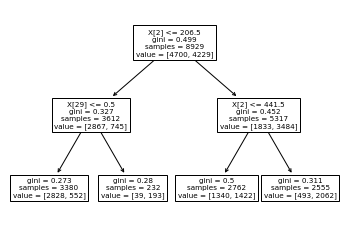

In [10]:
# c - plot
tree.plot_tree(model)
plt.show()